In [7]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [14]:
G=(lambda x,y: np.log(x**2+y**2)-np.sin(x*y)+np.log(2)+np.log(np.pi), \
   lambda x,y: np.exp(x-y) + np.cos(x*y) )

In [36]:
G1=(lambda x,y,z: 6*x-2*np.cos(y*z)-1, \
   lambda x,y,z: 9*y+np.sqrt(x**2+np.sin(z)+1.06)+0.9, \
   lambda x,y,z: 60*z+3*np.exp(-x*y)+10*np.pi-3 )

In [29]:
def vector(G,r):
    dim= len(G)
    v= np.zeros(dim)
    if dim == 2:
        for i in range(dim):
            v[i] =G[i](r[0], r[1])
    else:
        for i in range(dim):
            v[i] = G[i](r[0],r[1],r[2])
    return v

In [34]:
def jacobiano(G,r,h=1e-6):
    
    dim=len(G)
    j=np.zeros((dim,dim))
    if dim == 2:
        for i in range(dim):
            j[i,0]= ( G[i](r[0]+h, r[1]) - G[i](r[0]-h, r[1]))/(2*h)
            j[i,1]= ( G[i](r[0], r[1]+h) - G[i](r[0], r[1]-h))/(2*h) 
    else: 
        for i in range(dim):
            j[i,0] = ( G[i](r[0]+h,r[1],r[2]) - G[i](r[0]-h,r[1],r[2]) )/(2*h)
            j[i,1] = ( G[i](r[0],r[1]+h,r[2]) - G[i](r[0],r[1]-h,r[2]) )/(2*h)
            j[i,2] = ( G[i](r[0],r[1],r[2]+h) - G[i](r[0],r[1],r[2]-h) )/(2*h)
        
    return j.T

In [20]:
def metric(G,r):
    V= vector(G,r)
    
    return 0.5*np.linalg.norm(V)**2

In [22]:
def solve(G,r,lr=1e-4,epochs=int(1e5),error=1e-7):
    
    d= 1
    it=0
    Vector_f =np.array([])
    R_vector = np.array(r)
    
    while d > error and it < epochs:
        
        currentf= metric(G,r)
        J= jacobiano(G,r)
        Gvector= vector(G,r)
        
        r -= lr*np.dot(J,Gvector)
        R_vector = np.vstack((R_vector,r))
        Newf = metric(G,r)
        Vector_f = np.append(Vector_f, Newf)
        d= np.abs(currentf-Newf)/Newf
        
        if it%500 == 0:
            print(it,d)
            clear_output(wait=True)
            time.sleep(0.02)
            
        it += 1
        
    if d < error:
        print(' Entrenamiento completo ', d, 'iteraciones', it)
        
    if it == epochs:
        print(' Entrenamiento no completado ')
        
    return r,it,Vector_f,R_vector
        
        

In [39]:
x,it,F,R = solve(G,[2,2])
x

 Entrenamiento completo  9.992162967243859e-08 iteraciones 8984


array([0.96075834, 1.37958553])

In [40]:
x1,it1,F1,R1 = solve(G1,[0,0,0])
x1

 Entrenamiento completo  0.0 iteraciones 8536


array([ 0.49814468, -0.1996059 , -0.52882598])

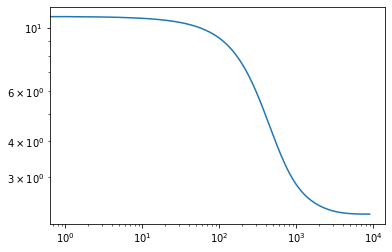

In [27]:
plt.plot(F)
plt.yscale("log")
plt.xscale("log")

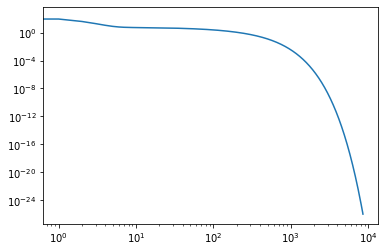

In [38]:
plt.plot(F1)
plt.yscale("log")
plt.xscale("log")